# Classification Decision Tree

* The code below demonstrates Classification Decision Trees.
* Decision Tree is a part of supervised machine learning and thus the dataset is split into **training and testing**.
* The Decision Tree algorithm uses **Entropy** for classification.
* The credit.csv dataset from the data folder is used here. This dataset represent loans obtained from a credit agency in Germany. The currency is recorded in Deutsche Marks (DM). The dataset contains various attributes for predicting whether a given customer would default a loan or not based on various factor such as balance, age, etc. The **dependent variable (default)** can have a value of either 1 (Non-Default) or 2 (Default).

## Implementation in Python

List of Python packages used for data analysis:

In [19]:
import pandas as pd
import numpy as np
from astropy.table import Table, Column
from sklearn.cross_validation import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

The credit.csv dataset is present in the data folder.

In [8]:
credit = pd.read_csv('./data/credit.csv')

A preview of the imported dataset:

In [3]:
head = int(raw_input("To display first N rows, enter N: "))
credit.head(head)

To display first N rows, enter N: 6


,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,job,dependents,telephone,foreign_worker,default
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,...,real estate,67,none,own,2,skilled employee,1,yes,yes,1
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,...,real estate,22,none,own,1,skilled employee,1,none,yes,2
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,1
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,...,building society savings,45,none,for free,1,skilled employee,2,none,yes,1
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,...,unknown/none,53,none,for free,2,skilled employee,2,none,yes,2
5,unknown,36,repaid,education,9055,unknown,1 - 4 yrs,2,single male,none,...,unknown/none,35,none,for free,1,unskilled resident,2,yes,yes,1


Displaying Summary statisitcs of all the numeric variables in the dataset. Nulls values are handled automatically.

In [4]:
credit.describe(percentiles=True)

,months_loan_duration,amount,installment_rate,residence_history,age,existing_credits,dependents,default
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
100%,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


The default variable indicates whether the loan applicant was unable to meet the agreed payment terms and went into default. From the summary above, it can be noticed that a total of 30 percent of the loans went into default.

Scatter plot matrix to visualize numeric data.

Populating the interactive namespace from numpy and matplotlib


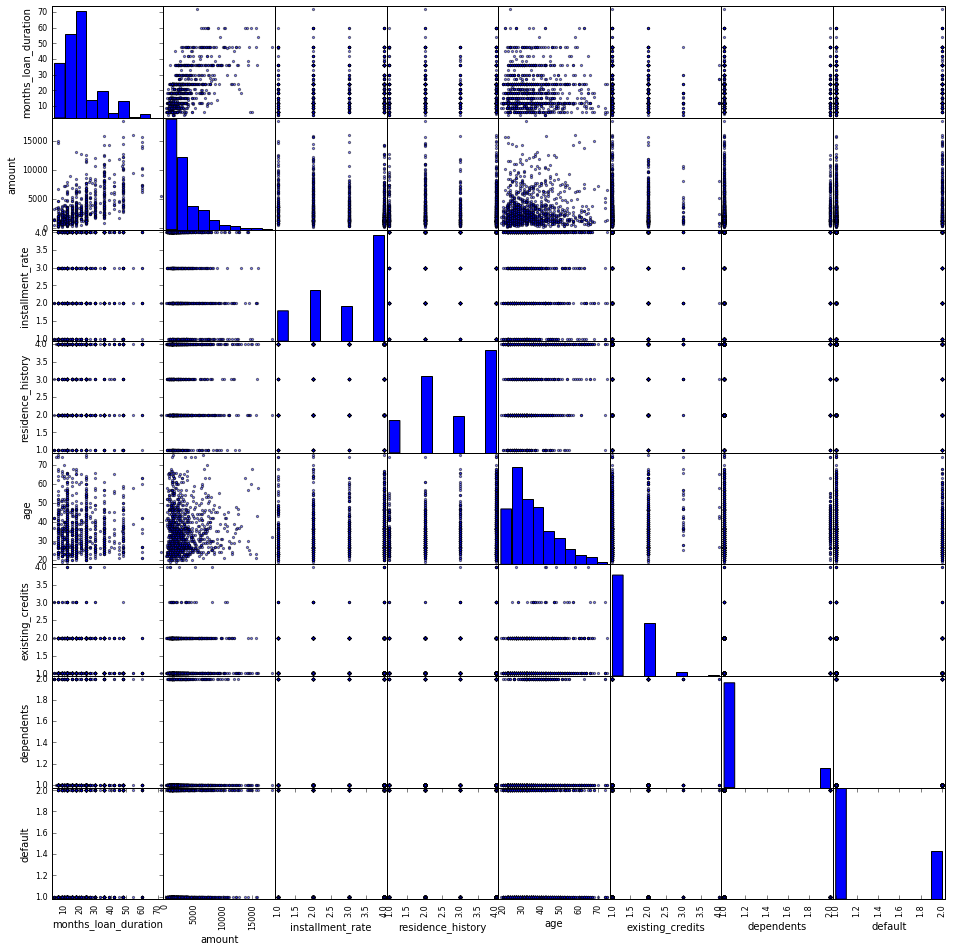

In [5]:
%pylab inline

axes = pd.tools.plotting.scatter_matrix(credit, alpha=0.5, figsize=(16, 16))

Let's take a look at some of the table outputs for a couple of features of loans that seem likely to predict a default. The checking_balance and savings_balance features indicate the applicant's checking and savings account balance, and are recorded as categorical variables.

In [33]:
checking_balance = credit['checking_balance']

checking_arr = np.array(checking_balance)
checking_cat = unique(checking_arr)

checking_cat1 = 0
checking_cat2 = 0
checking_cat3 = 0
checking_cat4 = 0

for i in range(0,len(checking_arr)):
    if checking_arr[i] == checking_cat[0]:
        checking_cat1 = checking_cat1 + 1
    elif checking_arr[i] == checking_cat[1]:
        checking_cat2 = checking_cat2 + 1
    elif checking_arr[i] == checking_cat[2]:
        checking_cat3 = checking_cat3 + 1
    else:
        checking_cat4 = checking_cat4 + 1

checking_category = [checking_cat[0], checking_cat[1], checking_cat[2], checking_cat[3]]
checking_count = [checking_cat1, checking_cat2, checking_cat3, checking_cat4]
table1 = Table([checking_category, checking_count], names=('category','count'))
print table1

 category  count
---------- -----
1 - 200 DM   269
    < 0 DM   274
  > 200 DM    63
   unknown   394


In [34]:
savings_balance = credit['savings_balance']

savings_arr = np.array(savings_balance)
savings_cat = unique(savings_arr)

savings_cat1 = 0
savings_cat2 = 0
savings_cat3 = 0
savings_cat4 = 0
savings_cat5 = 0

for i in range(0,len(savings_arr)):
    if savings_arr[i] == savings_cat[0]:
        savings_cat1 = savings_cat1 + 1
    elif savings_arr[i] == savings_cat[1]:
        savings_cat2 = savings_cat2 + 1
    elif savings_arr[i] == savings_cat[2]:
        savings_cat3 = savings_cat3 + 1
    elif savings_arr[i] == savings_cat[3]:
        savings_cat4 = savings_cat4 + 1
    else:
        savings_cat5 = savings_cat5 + 1

savings_category = [savings_cat[0], savings_cat[1], savings_cat[2], savings_cat[3],savings_cat[4]]
savings_count = [savings_cat1, savings_cat2, savings_cat3, savings_cat4, savings_cat5]
table1 = Table([savings_category, savings_count], names=('category','count'))
print table1

   category   count
------------- -----
 101 - 500 DM   103
501 - 1000 DM    63
     < 100 DM   603
    > 1000 DM    48
      unknown   183


### Splitting the dataset

The dataset is split into two parts: *training* and *testing*. The training part is used for fitting the model and the testing part is used for assessing the model. The split is done randomly to eliminate bias. The ```train_test_split()``` function in the ```sklearn``` package is used for generating 800 random samples as training data and the remaining as testing data.

In [9]:
train, test = train_test_split(credit, train_size = 0.8)

In [10]:
training_X = train.drop('default', axis = 1)
training_Y = train['default']

In [11]:
testing_X = test.drop('default', axis = 1)
testing_Y = test['default']

In [12]:
training_data_X = pd.get_dummies(training_X)

In [13]:
testing_data_X = pd.get_dummies(testing_X)

In [14]:
len(training_data_X)

800

### Decision Tree Model

In [20]:
dtree = tree.DecisionTreeClassifier(criterion = "entropy")
tree = dtree.fit(training_data_X, training_Y)

In [21]:
with open('tree.dot', 'w') as dotfile:
    export_graphviz(
        tree,
        dotfile)

### Prediction and Accuracy

In [22]:
predictions_dtree = tree.predict(testing_data_X) #generate predictions
print predictions_dtree

[2 2 1 1 1 1 2 1 2 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 2 1 1 1 2 1 2 1 1
 1 1 1 1 2 1 2 1 1 1 2 2 2 1 1 2 2 1 2 1 1 2 1 2 1 1 1 2 2 1 2 1 1 1 1 1 1
 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 2 1 1 2 1 2 1 1 2
 1 1 2 1 1 2 1 1 1 1 1 1 2 1 1 2 2 1 2 1 1 2 1 1 2 1 2 2 1 1 1 2 1 2 1 2 1
 1 2 1 1 1 1 1 2 1 1 2 1 2 1 1 1 1 2 1 1 2 1 1 1 1 2 1 1 2 1 1 2 1 1 1 1 1
 1 1 1 1 1 1 2 2 1 1 1 1 1 1 2]


In [23]:
print "Evaluation metrics: "
print "Accuracy of the model: %.2f" % (metrics.accuracy_score(testing_Y, predictions_dtree)*100),"%"
print "Mean Squared error: %.2f" % (metrics.mean_squared_error(testing_Y,predictions_dtree)*100),'%'

Evaluation metrics: 
Accuracy of the model: 69.00 %
Mean Squared error: 31.00 %


In [24]:
print "\n\nConfusion Matrix: "
print metrics.confusion_matrix(testing_Y, predictions_dtree)


print "\n\nClassification Report: "
print metrics.classification_report(testing_Y, predictions_dtree)



Confusion Matrix: 
[[113  31]
 [ 31  25]]


Classification Report: 
             precision    recall  f1-score   support

          1       0.78      0.78      0.78       144
          2       0.45      0.45      0.45        56

avg / total       0.69      0.69      0.69       200



### Tree Pruning

In [25]:
scores = cross_val_score(DecisionTreeClassifier(), \
                         testing_data_X, \
                         testing_Y, \
                         scoring='accuracy', 
                         cv=10)

print "Cross-Validated Scores: ", scores
print "\nAvg accuracy of cross-validations:  %.2f" % (scores.mean()*100), "%"

Cross-Validated Scores:  [ 0.80952381  0.61904762  0.61904762  0.61904762  0.6         0.55
  0.68421053  0.52631579  0.78947368  0.84210526]

Avg accuracy of cross-validations:  66.59 %


In [32]:
dtree = tree.DecisionTreeClassifier(criterion = "entropy")
tree = dtree.fit(training_data_X, training_Y)

AttributeError: 'DecisionTreeClassifier' object has no attribute 'DecisionTreeClassifier'